In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/All_Data_Aldi.csv")
data

,supermarket,prices_(¬£),prices_unit_(¬£),unit,names,date,category,own_brand
0,Aldi,1.45,0.64,l,Cowbelle British Semi-skimmed Milk 1.7% Fat 4 ...,20240129,fresh_food,False
1,Aldi,1.99,1.99,unit,Eat & Go Fish Selection Sushi Bar 129g,20240129,fresh_food,False
2,Aldi,0.45,2.80,kg,Brooklea Light Smooth Toffee Yogurt 160g,20240129,fresh_food,False
3,Aldi,1.99,13.30,kg,Ashfield Farm Cooked Chicken Breast Slices 150g,20240129,fresh_food,False
4,Aldi,2.49,6.20,kg,Inspired Cuisine Chicken & Bacon Pasta Bake 400g,20240129,fresh_food,False
...,...,...,...,...,...,...,...,...
104050,Aldi,0.65,10.00,kg,Vitacat Pawsome Pockets With Salmon 65g,20240109,pets,False
104051,Aldi,0.39,3.90,kg,Vitacat Select Tender P√¢t√© With Salmon 100g,20240109,pets,False
104052,Aldi,0.49,3.30,kg,Earls Select Tender P√¢t√© With Beef & Turkey ...,20240109,pets,False
104053,Aldi,0.39,3.90,kg,Vitacat Select Tender P√¢t√© With Beef 100g,20240109,pets,False


In [ ]:

df = data

In [ ]:
df.head()

,supermarket,prices_(¬£),prices_unit_(¬£),unit,names,date,category,own_brand
0,Aldi,1.45,0.64,l,Cowbelle British Semi-skimmed Milk 1.7% Fat 4 ...,20240129,fresh_food,False
1,Aldi,1.99,1.99,unit,Eat & Go Fish Selection Sushi Bar 129g,20240129,fresh_food,False
2,Aldi,0.45,2.80,kg,Brooklea Light Smooth Toffee Yogurt 160g,20240129,fresh_food,False
3,Aldi,1.99,13.30,kg,Ashfield Farm Cooked Chicken Breast Slices 150g,20240129,fresh_food,False
4,Aldi,2.49,6.20,kg,Inspired Cuisine Chicken & Bacon Pasta Bake 400g,20240129,fresh_food,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104055 entries, 0 to 104054
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   supermarket       104055 non-null  object 
 1   prices_(¬£)       104055 non-null  float64
 2   prices_unit_(¬£)  104053 non-null  float64
 3   unit              104053 non-null  object 
 4   names             104055 non-null  object 
 5   date              104055 non-null  int64  
 6   category          104055 non-null  object 
 7   own_brand         104055 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 5.7+ MB


In [ ]:
df.isnull().sum()

,0
supermarket,0
prices_(¬£),0
prices_unit_(¬£),2
unit,2
names,0
date,0
category,0
own_brand,0


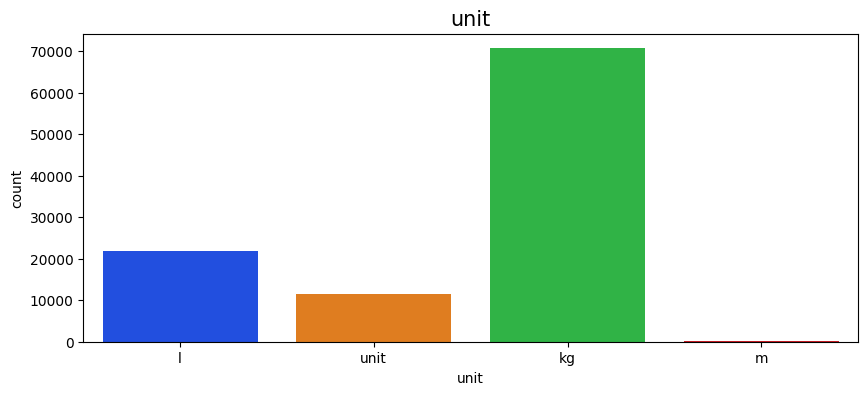

In [ ]:
plt.figure(figsize = (10,4))
sns.countplot(x = df['unit'], palette = 'bright')
plt.title('unit' , fontsize = 15)
plt.show()

In [ ]:
print(df['category'].unique())

['fresh_food' 'bakery' 'household' 'health_products' 'food_cupboard'
 'baby_products' 'drinks' 'frozen' 'free-from' 'pets']


In [ ]:
print(df['own_brand'].unique())

[False  True]


In [ ]:
print("Dates in range:", df[df['date'].between(2022, 2024)].shape[0])
print("Fresh food rows:", df[df['category'] == 'fresh_food'].shape[0])
print("Unit kg rows:", df[df['unit'] == 'kg'].shape[0])

Dates in range: 0
Fresh food rows: 35465
Unit kg rows: 70680


In [ ]:
print(df['date'].head())
print(df['date'].dtype)

0    20240129
1    20240129
2    20240129
3    20240129
4    20240129
Name: date, dtype: int64
int64


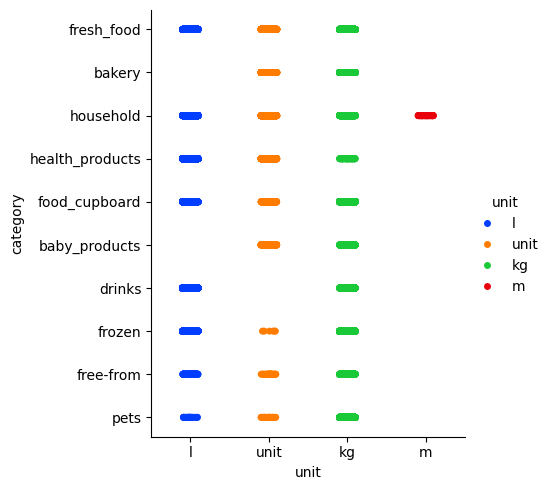

In [ ]:
sns.catplot(data = df  , x = 'unit', y = 'category' , kind = 'strip' ,hue = 'unit', palette = 'bright')
plt.show()

In [ ]:
top10 = data.sort_values('unit', ascending=False).head(10)
print(top10)

      supermarket  prices_(¬£)  prices_unit_(¬£)  unit  \
30947        Aldi         1.75              1.75  unit   
41647        Aldi         2.49              0.42  unit   
41636        Aldi         1.99              1.99  unit   
75638        Aldi         2.29              0.02  unit   
94865        Aldi         1.29              0.22  unit   
13465        Aldi         1.99              0.50  unit   
75641        Aldi         1.99              0.03  unit   
75643        Aldi         4.39              0.22  unit   
13471        Aldi         2.89              0.06  unit   
94859        Aldi         0.75              0.75  unit   

                                                   names      date  \
30947                 Eat & Go Cheese Layered Salad 365g  20240123   
41647                 Organic Large Scottish Eggs 6 Pack  20240121   
41636  Eat & Go Chicken, Tomato & Basil Topped Pasta ...  20240121   
75638               Activ-max Vitamin D Tablets 105 Pack  20240114   
94865      

In [ ]:
top10 = data.sort_values('category',  ascending = False).head(10)
print(top10)

       supermarket  prices_(¬£)  prices_unit_(¬£) unit  \
104054        Aldi         0.39              3.90   kg   
83722         Aldi         4.59              2.55   kg   
72631         Aldi         0.49              5.76   kg   
72630         Aldi         0.75              1.88   kg   
2958          Aldi         0.75              1.88   kg   
2959          Aldi         0.49              3.30   kg   
2960          Aldi         5.49              2.32   kg   
39490         Aldi         1.79             19.89   kg   
39491         Aldi         0.65              2.17   kg   
39492         Aldi        10.99              2.29   kg   

                                                    names      date category  \
104054          Vitacat Select With Chicken In Jelly 100g  20240109     pets   
83722           Earls Tender Pate Meaty Selection 12x150g  20240113     pets   
72631   Vitacat Select Gourmet Mousse With Ocean Fish 85g  20240115     pets   
72630            Vitacat Cat Cans - Chick

In [ ]:
data['unit'] = pd.to_numeric(data['unit'], errors='coerce')

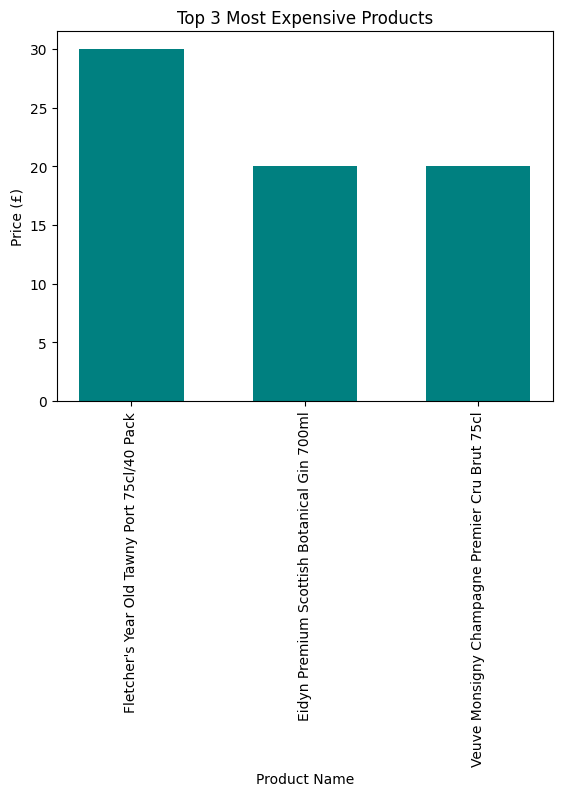

In [ ]:
top3_products = data.sort_values('prices_(¬£)', ascending=False).head(10)

plt.bar(top3_products['names'], top3_products['prices_(¬£)'], color='teal', width=0.6)
plt.title("Top 3 Most Expensive Products")
plt.xlabel("Product Name")
plt.ylabel("Price (£)")
plt.xticks(rotation=90)
plt.show()

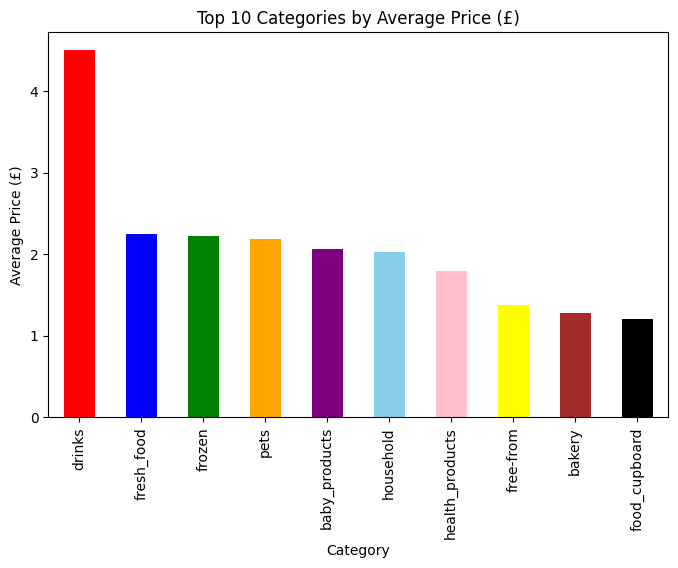

In [ ]:
category_avg = data.groupby('category')['prices_(¬£)'].mean().sort_values(ascending=False).head(10)
colors = ['red', 'blue' , 'green', 'orange' , 'purple' , 'skyblue' , 'pink' ,  'yellow','brown', 'black']
category_avg.plot(kind='bar', color= colors, figsize=(8,5))
plt.title("Top 10 Categories by Average Price (£)")
plt.xlabel("Category")
plt.ylabel("Average Price (£)")
plt.show()

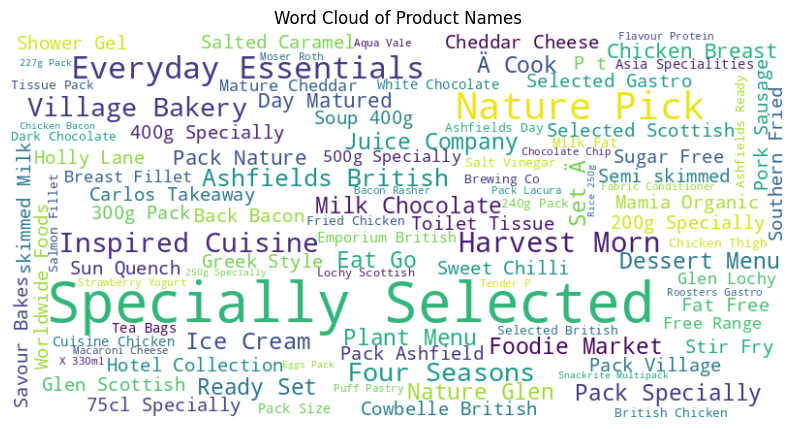

In [ ]:
text = " ".join(data['names'].astype(str))


wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap='viridis',
                      max_words=100).generate(text)


plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Product Names")
plt.show()